In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
apple = yf.download("AAPL", start="1980-12-12",end = "2022-01-07")

[*********************100%***********************]  1 of 1 completed


In [6]:
apple = apple.Close.to_frame() 

In [7]:
apple

,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862
...,...
2021-12-31,177.570007
2022-01-03,182.009995
2022-01-04,179.699997


In [9]:
apple['d_returns']= np.log(apple.div(apple.shift(1)))

In [10]:
apple

,Close,d_returns
Date,,
1980-12-12,0.128348,NaN
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
...,...,...
2021-12-31,177.570007,-0.003542
2022-01-03,182.009995,0.024697
2022-01-04,179.699997,-0.012773


In [11]:
apple.dropna(inplace=True)

In [12]:
apple


,Close,d_returns
Date,,
1980-12-15,0.121652,-0.053581
1980-12-16,0.112723,-0.076231
1980-12-17,0.115513,0.024450
1980-12-18,0.118862,0.028580
1980-12-19,0.126116,0.059239
...,...,...
2021-12-31,177.570007,-0.003542
2022-01-03,182.009995,0.024697
2022-01-04,179.699997,-0.012773


In [13]:
apple.d_returns.sum()

7.200504486333217

In [14]:
np.exp(apple.d_returns.sum())

1340.1066593849027

In [15]:
apple['cummreturns']=apple.d_returns.cumsum().apply(np.exp)

In [16]:
apple

,Close,d_returns,cummreturns
Date,,,
1980-12-15,0.121652,-0.053581,0.947829
1980-12-16,0.112723,-0.076231,0.878261
1980-12-17,0.115513,0.024450,0.899998
1980-12-18,0.118862,0.028580,0.926092
1980-12-19,0.126116,0.059239,0.982610
...,...,...,...
2021-12-31,177.570007,-0.003542,1383.504357
2022-01-03,182.009995,0.024697,1418.097708
2022-01-04,179.699997,-0.012773,1400.099783


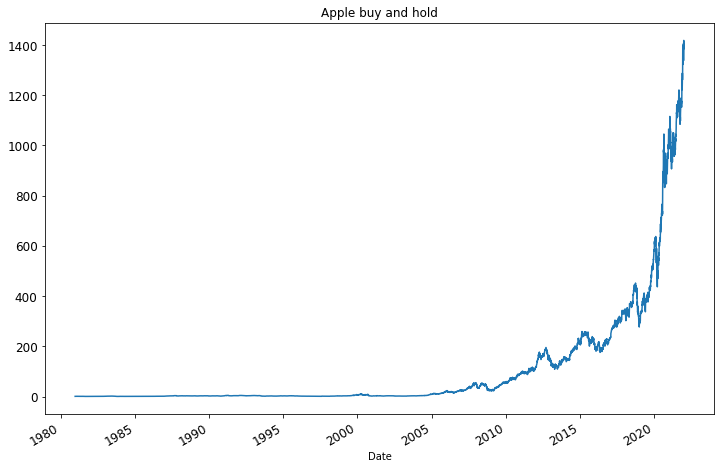

In [17]:
apple.cummreturns.plot(figsize = (12,8), title = "Apple buy and hold",fontsize = 12)
plt.show()

In [18]:
apple.d_returns.mean()*252

0.17523197784219977

In [19]:
apple.d_returns.std()*np.sqrt(252)

0.4578906792664507

#### how to calculate drawdowns


In [20]:
apple["cummax"] = apple.cummreturns.cummax()

In [21]:
apple

,Close,d_returns,cummreturns,cummax
Date,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829
1980-12-16,0.112723,-0.076231,0.878261,0.947829
1980-12-17,0.115513,0.024450,0.899998,0.947829
1980-12-18,0.118862,0.028580,0.926092,0.947829
1980-12-19,0.126116,0.059239,0.982610,0.982610
...,...,...,...,...
2021-12-31,177.570007,-0.003542,1383.504357,1405.008351
2022-01-03,182.009995,0.024697,1418.097708,1418.097708
2022-01-04,179.699997,-0.012773,1400.099783,1418.097708


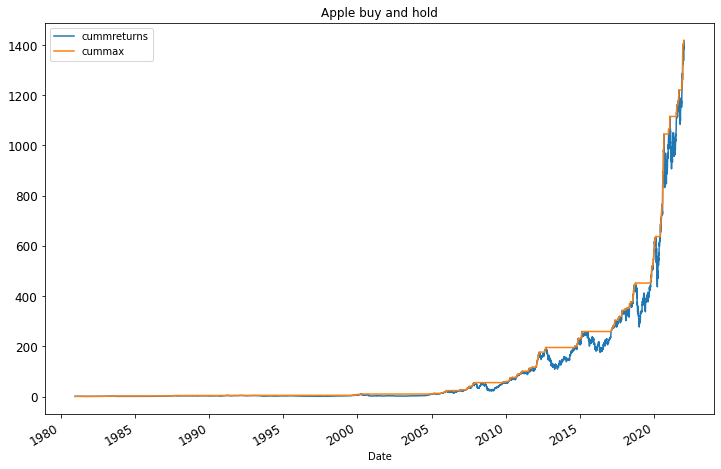

In [22]:
apple[["cummreturns","cummax"]].plot(figsize = (12,8), title = "Apple buy and hold",fontsize = 12)
plt.show()

In [23]:
apple['drawdown'] = apple["cummax"]-apple['cummreturns']

In [24]:
apple

,Close,d_returns,cummreturns,cummax,drawdown
Date,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000
...,...,...,...,...,...
2021-12-31,177.570007,-0.003542,1383.504357,1405.008351,21.503994
2022-01-03,182.009995,0.024697,1418.097708,1418.097708,0.000000
2022-01-04,179.699997,-0.012773,1400.099783,1418.097708,17.997925


In [25]:
apple.drawdown.max()

213.01459976724834

In [26]:
apple.drawdown.idxmax()

Timestamp('2020-09-18 00:00:00')

In [27]:
apple.loc[(apple.index == '2020-09-18 00:00:00' )]

,Close,d_returns,cummreturns,cummax,drawdown
Date,,,,,
2020-09-18,106.839996,-0.032234,832.424364,1045.438964,213.0146


In [28]:
apple["drawdown%"] = (apple["cummax"]-apple['cummreturns'])/apple["cummax"]

In [29]:
apple

,Close,d_returns,cummreturns,cummax,drawdown,drawdown%
Date,,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569,0.073398
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831,0.050464
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738,0.022934
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000,0.000000
...,...,...,...,...,...,...
2021-12-31,177.570007,-0.003542,1383.504357,1405.008351,21.503994,0.015305
2022-01-03,182.009995,0.024697,1418.097708,1418.097708,0.000000,0.000000
2022-01-04,179.699997,-0.012773,1400.099783,1418.097708,17.997925,0.012692


In [30]:
apple["drawdown%"].max()

0.82216567924191

In [31]:
apple["drawdown%"].idxmax()

Timestamp('1997-12-23 00:00:00')

In [33]:
apple.loc[(apple.index <= '1997-12-23 00:00:00' )]

,Close,d_returns,cummreturns,cummax,drawdown,drawdown%
Date,,,,,,
1980-12-15,0.121652,-0.053581,0.947829,0.947829,0.000000,0.000000
1980-12-16,0.112723,-0.076231,0.878261,0.947829,0.069569,0.073398
1980-12-17,0.115513,0.024450,0.899998,0.947829,0.047831,0.050464
1980-12-18,0.118862,0.028580,0.926092,0.947829,0.021738,0.022934
1980-12-19,0.126116,0.059239,0.982610,0.982610,0.000000,0.000000
...,...,...,...,...,...,...
1997-12-17,0.124442,-0.026549,0.969567,5.060882,4.091315,0.808419
1997-12-18,0.123326,-0.009008,0.960872,5.060882,4.100010,0.810137
1997-12-19,0.122210,-0.009090,0.952177,5.060882,4.108705,0.811856


## SMA  Strategy

MA(moving average) = SMA (simple moving average) = DMA (daily moving average)
EMA ( exponential moving average )

In [36]:
data = apple.Close.loc[(apple.index >= '1991-01-01' )]

In [38]:
data = data.to_frame()

In [39]:
data

,Close
Date,
1991-01-02,0.388393
1991-01-03,0.383929
1991-01-04,0.386161
1991-01-07,0.386161
1991-01-08,0.386161
...,...
2021-12-31,177.570007
2022-01-03,182.009995
2022-01-04,179.699997


In [40]:
sma_s = 50
sma_l = 100

In [41]:
data["sma_s"] = data.Close.rolling(sma_s).mean()
data["sma_l"] = data.Close.rolling(sma_l).mean()

In [42]:
data

,Close,sma_s,sma_l
Date,,,
1991-01-02,0.388393,NaN,NaN
1991-01-03,0.383929,NaN,NaN
1991-01-04,0.386161,NaN,NaN
1991-01-07,0.386161,NaN,NaN
1991-01-08,0.386161,NaN,NaN
...,...,...,...
2021-12-31,177.570007,162.097601,154.6399
2022-01-03,182.009995,162.748201,155.0014
2022-01-04,179.699997,163.368401,155.3095


<AxesSubplot:title={'center':'AAPLE - SMA50 |  SMA100'}, xlabel='Date'>

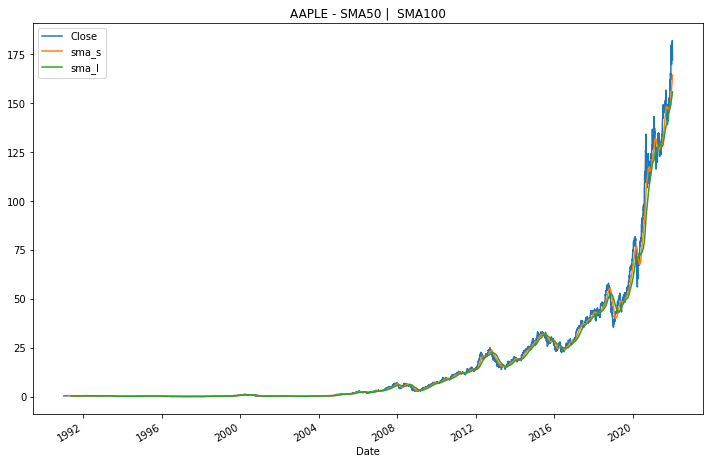

In [43]:
data.plot(figsize=(12,8),title = "AAPLE - SMA{} |  SMA{}".format(sma_s, sma_l))


<AxesSubplot:title={'center':'AAPLE - SMA50 |  SMA100'}, xlabel='Date'>

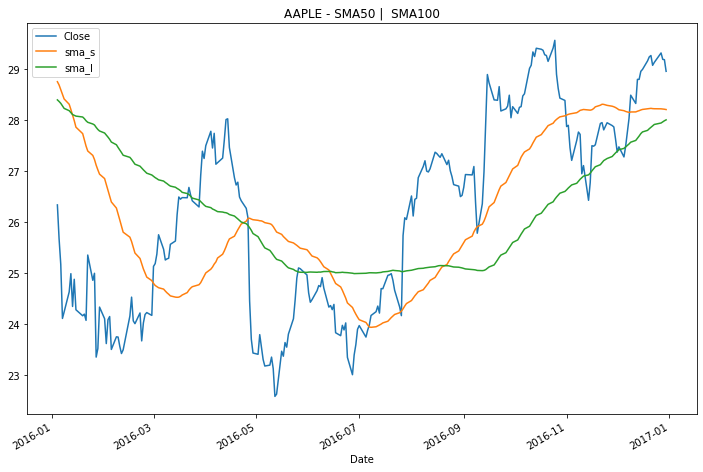

In [45]:
data.loc["2016"].plot(figsize=(12,8),title = "AAPLE - SMA{} |  SMA{}".format(sma_s, sma_l))


In [46]:
data.dropna(inplace = True)

In [47]:
data

,Close,sma_s,sma_l
Date,,,
1991-05-23,0.402902,0.534420,0.513326
1991-05-24,0.409598,0.530960,0.513538
1991-05-28,0.410714,0.527344,0.513806
1991-05-29,0.419643,0.523638,0.514141
1991-05-30,0.425223,0.519732,0.514531
...,...,...,...
2021-12-31,177.570007,162.097601,154.639900
2022-01-03,182.009995,162.748201,155.001400
2022-01-04,179.699997,163.368401,155.309500


In [48]:
data["position"] = np.where(data["sma_s"]>data["sma_l"],1,-1)

In [49]:
data

,Close,sma_s,sma_l,position
Date,,,,
1991-05-23,0.402902,0.534420,0.513326,1
1991-05-24,0.409598,0.530960,0.513538,1
1991-05-28,0.410714,0.527344,0.513806,1
1991-05-29,0.419643,0.523638,0.514141,1
1991-05-30,0.425223,0.519732,0.514531,1
...,...,...,...,...
2021-12-31,177.570007,162.097601,154.639900,1
2022-01-03,182.009995,162.748201,155.001400,1
2022-01-04,179.699997,163.368401,155.309500,1


<AxesSubplot:title={'center':'AAPLE - SMA50 |  SMA100'}, xlabel='Date'>

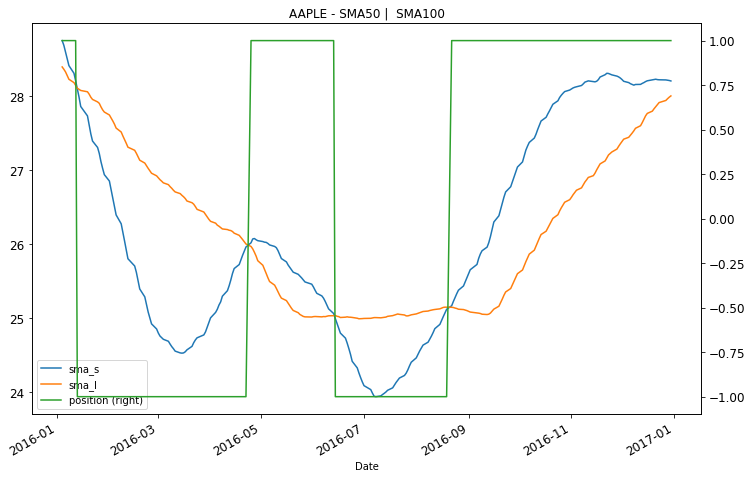

In [54]:
data.loc["2016",["sma_s","sma_l","position"]].plot(figsize=(12,8),title = "AAPLE - SMA{} |  SMA{}".format(sma_s, sma_l), fontsize = 12, secondary_y ='position')


In [55]:
data["returnsb&h"] = np.log(data.Close.div(data.Close.shift(1)))

In [58]:
data["strategy"] = data["returnsb&h"]*data.position.shift(1)

In [59]:
data

,Close,sma_s,sma_l,position,returnsb&h,strategy
Date,,,,,,
1991-05-23,0.402902,0.534420,0.513326,1,NaN,NaN
1991-05-24,0.409598,0.530960,0.513538,1,0.016483,0.016483
1991-05-28,0.410714,0.527344,0.513806,1,0.002721,0.002721
1991-05-29,0.419643,0.523638,0.514141,1,0.021507,0.021507
1991-05-30,0.425223,0.519732,0.514531,1,0.013209,0.013209
...,...,...,...,...,...,...
2021-12-31,177.570007,162.097601,154.639900,1,-0.003542,-0.003542
2022-01-03,182.009995,162.748201,155.001400,1,0.024697,0.024697
2022-01-04,179.699997,163.368401,155.309500,1,-0.012773,-0.012773


In [60]:
data.dropna(inplace = True)

In [61]:
data[["returnsb&h","strategy"]].sum()

returnsb&h    6.056556
strategy      1.951082
dtype: float64

In [62]:
data[["returnsb&h","strategy"]].sum().apply(np.exp) 

returnsb&h    426.902813
strategy        7.036295
dtype: float64

In [63]:
data[["returnsb&h","strategy"]].std()*np.sqrt(252) 

returnsb&h    0.442641
strategy      0.442798
dtype: float64

<AxesSubplot:xlabel='Date'>

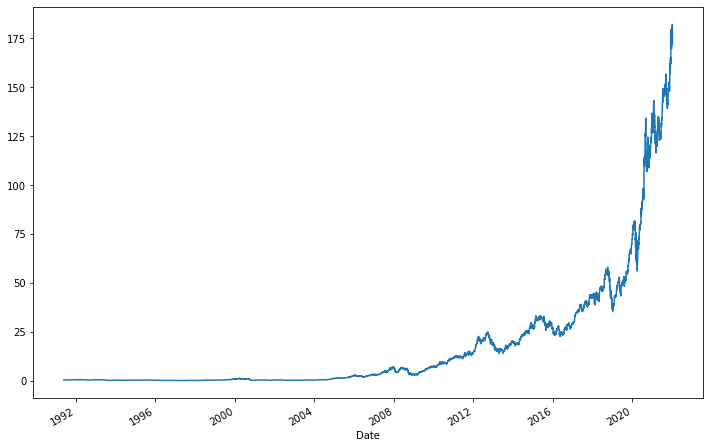

In [65]:
data.Close.plot(figsize = (12,8))

## Strategy adjusted with long bias

In [66]:
data["position2"] = np.where(data["sma_s"]>data["sma_l"],1,0)

In [71]:
data["strategy2"] = data["returnsb&h"]*data.position2.shift(1)

In [72]:
data

,Close,sma_s,sma_l,position,returnsb&h,strategy,position2,strategy2
Date,,,,,,,,
1991-05-28,0.410714,0.527344,0.513806,1,0.002721,0.002721,1,NaN
1991-05-29,0.419643,0.523638,0.514141,1,0.021507,0.021507,1,0.021507
1991-05-30,0.425223,0.519732,0.514531,1,0.013209,0.013209,1,0.013209
1991-05-31,0.419643,0.516027,0.514866,1,-0.013209,-0.013209,1,-0.013209
1991-06-03,0.439732,0.513259,0.515223,-1,0.046761,0.046761,0,0.046761
...,...,...,...,...,...,...,...,...
2021-12-31,177.570007,162.097601,154.639900,1,-0.003542,-0.003542,1,-0.003542
2022-01-03,182.009995,162.748201,155.001400,1,0.024697,0.024697,1,0.024697
2022-01-04,179.699997,163.368401,155.309500,1,-0.012773,-0.012773,1,-0.012773


In [73]:
data.dropna(inplace = True)

In [74]:
data[["returnsb&h","strategy2"]].sum()

returnsb&h    6.037353
strategy2     3.984615
dtype: float64

In [75]:
data[["returnsb&h","strategy2"]].sum().apply(np.exp) 

returnsb&h    418.782900
strategy2      53.764605
dtype: float64

In [76]:
data[["returnsb&h","strategy2"]].std()*np.sqrt(252) 

returnsb&h    0.442689
strategy2     0.343623
dtype: float64

In [77]:
## Strategy 2 is better than strategy 1
data[["strategy","strategy2"]].std()*np.sqrt(252) 

strategy     0.442845
strategy2    0.343623
dtype: float64

## creating our first function

In [78]:
def test_strategy(stock,start,end,SMA):
    df = yf.download(stock,start = start,end = end)
    data = df.Close.to_frame()
    data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
    data["SMA_S"] = data.Close.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.Close.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"]>data["SMA_L"],1,-1)
    data["strategy"] = data["returns"]*data.position.shift(1)
    
    ret= np.exp(data["strategy"].sum()) 
    std = data["strategy"].std()*np.sqrt(252)
    
    return ret,std

In [81]:
test_strategy("SBI","2000-01-01","2020-01-01",(50,200))

[*********************100%***********************]  1 of 1 completed


(1.285221585869784, 0.14598284406859566)

## Creating the Class

In [93]:
class SMABacktester():
    def __init__(self,symbol,SMA_S, SMA_L, start,end):
        self.symbol = symbol
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        self.start = start
        self.end = end
        self.results = None
        self.get_data()
    def get_data(self):
        df = yf.download(self.symbol,start = self.start,end = self.end)
        data = df.Close.to_frame()
        data["returns"] = np.log(data.Close.div(data.Close.shift(1)))
        data["SMA_S"] = data.Close.rolling(self.SMA_S).mean()
        data["SMA_L"] = data.Close.rolling(self.SMA_L).mean()
        data.dropna(inplace = True)
        self.data2 = data
        return data
    def test_results(self):
        data = self.data2.copy().dropna()
        data["position"] = np.where(data["SMA_S"]>data["SMA_L"],1,-1)
        data["strategy"] = data["returns"]*data.position.shift(1)
        
        data["returnsbh"] = data["returns"].cumsum().apply(np.exp)
        data["returnstrategy"] = data["strategy"].cumsum().apply(np.exp)
        
        perf = data["returnstrategy"].iloc[-1]
        outperf = perf - data["returnsbh"].iloc[-1]
        
        self.results= data
    
        ret= np.exp(data["strategy"].sum()) 
        std = data["strategy"].std()*np.sqrt(252)
        
        #return ret,std
        return round(perf,6), round(outperf,6)
    
    
    def plot_results(self):
        if self.results is None:
            print("Run the test please")
        else:
            title = "{}| SMA_S = {} | SMA_L {}".format(self.symbol,self.SMA_S,self.SMA_L)
            self.results[["returnsbh","returnstrategy"]].plot(title = title, figsize =(12,8))
            
        
        
        
        

In [94]:
tester = SMABacktester("SPY",50,100,"2000-01-01","2020-01-01")

[*********************100%***********************]  1 of 1 completed


In [95]:
tester.test_results()

(2.634999, 0.337025)

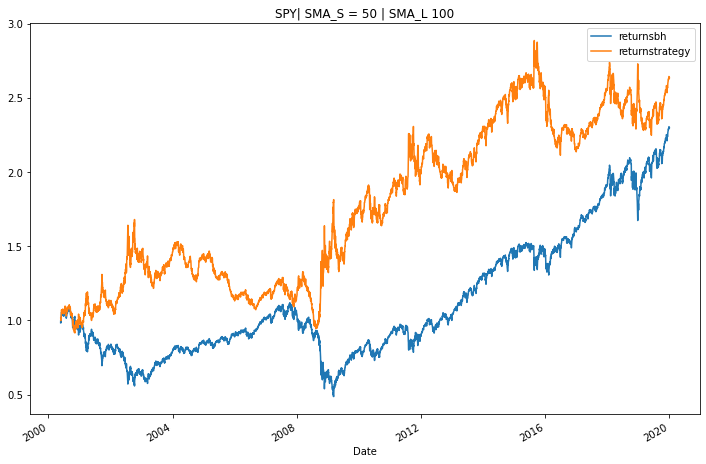

In [96]:
tester.plot_results()